# **Import Data**

In [3]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import json
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
%pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Erico\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Erico\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Note: you may need to restart the kernel to use updated packages.


In [4]:
# Membaca file CSV
df = pd.read_csv('../data/kaburajadulu_raw.csv')
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1897055555249897947,Tue Mar 04 23:37:53 +0000 2025,0,@rizalakbarm_ ak jg dukung km #kaburajadulu di...,1897069015312531763,NaN,rizalakbarm_,in,🤍 Shania Gracia,0,1,0,https://x.com/SCrisdiv/status/1897069015312531763,617091843,SCrisdiv
1,1897065671642714552,Tue Mar 04 23:25:04 +0000 2025,0,Just met Abang Gojek yang well prepared #Kabur...,1897065789964104063,NaN,DaraJunico,in,Indonesia,0,0,0,https://x.com/DaraJunico/status/18970657899641...,2219255499,DaraJunico
2,1897061200674054267,Tue Mar 04 23:06:50 +0000 2025,2,lagi santai kawan #VIDEO #videoviral #KaburAja...,1897061200674054267,https://pbs.twimg.com/ext_tw_video_thumb/18970...,NaN,in,NaN,0,0,1,https://x.com/Aritogel_resmi/status/1897061200...,1794911231209570304,Aritogel_resmi
3,1897060699253493879,Tue Mar 04 23:04:51 +0000 2025,1,klo tujuan ainana jd top idol apa tujuan gw #k...,1897060699253493879,NaN,NaN,in,NaN,0,1,0,https://x.com/kakfaruzan/status/18970606992534...,1583780018886365184,kakfaruzan
4,1896741626422456405,Tue Mar 04 23:01:32 +0000 2025,0,@susipudjiastuti @prabowo @ListyoSigitP Percum...,1897059867036447150,NaN,susipudjiastuti,in,"Jakarta Capital Region, Indone",0,0,0,https://x.com/DonnyBonardo/status/189705986703...,2474041962,DonnyBonardo


# **Pengurutan Data**

In [ ]:
# PROSES MENGURUTKAN DATA BERDASARKAN TANGGAL

# Konversi kolom "created_at" ke tipe datetime
df["created_at"] = pd.to_datetime(df["created_at"], format="%a %b %d %H:%M:%S %z %Y")

# Urutkan data dari yang paling lama ke yang terbaru
df_sorted = df.sort_values(by="created_at", ascending=True)

# Simpan kembali data yang sudah terurut
df_sorted.to_csv("kaburajadulu_sorted.csv", index=False)

# Cek hasil
print(df_sorted[["created_at"]].head())  # 5 data teratas
print(df_sorted[["created_at"]].tail())  # 5 data terbawah

# Simpan file yang sudah diurutkan ke folder data
output_path = "../data/kaburajadulu_sorted.csv"
df_sorted.to_csv(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")


                     created_at
20314 2024-07-28 11:05:44+00:00
20313 2024-07-28 12:51:57+00:00
20312 2024-07-29 08:07:32+00:00
20311 2024-07-29 10:55:52+00:00
20310 2024-07-29 12:01:20+00:00
                     created_at
20319 2025-04-06 17:20:00+00:00
20318 2025-04-06 17:29:24+00:00
20317 2025-04-06 18:01:56+00:00
20316 2025-04-06 18:11:31+00:00
20315 2025-04-06 18:52:10+00:00
✅ Data berhasil disimpan ke ../data/kaburajadulu_sorted.csv


In [6]:
# PROSES MENGGANTI DF MENJADI DATASET YANG SUDAH DIURUTKAN
df = pd.read_csv(output_path)

# Ambil hanya kolom 'full_text'
df = df[['full_text']]
df.head()

,full_text
0,@IqbalRa17664055 @rwp1byte aku nyusul kerja aj...
1,#KaburAjaDulu bole juga ni hashtag
2,#KaburAjaDulu
3,Ehhh ini Mas Adith #KaburAjaDulu ya? Mohon ma...
4,Dengan ini saya resmikan pemilik hashtag #Kabu...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20954 entries, 0 to 20953
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  20954 non-null  object
dtypes: object(1)
memory usage: 163.8+ KB


In [8]:
# PROSES UNTUK MENGHAPUS DATA YANG DUPLIKAT
df.drop_duplicates(subset='full_text', keep = 'first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19496 entries, 0 to 20953
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  19496 non-null  object
dtypes: object(1)
memory usage: 304.6+ KB


# **Visualisasi Data sebelum di process**

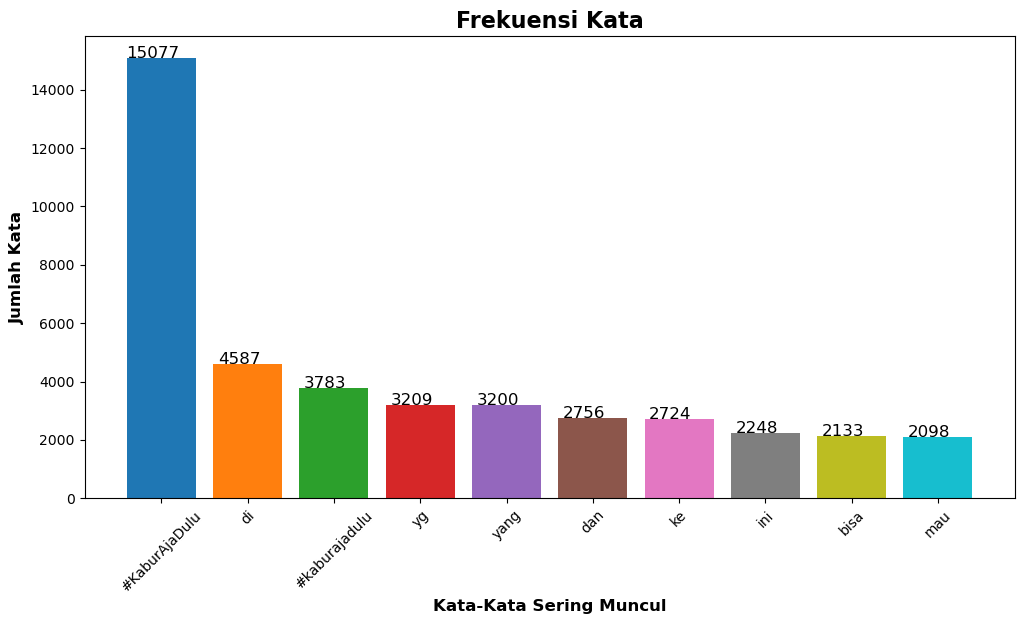

In [9]:
#memvisualisasikan frekuensi kata teratas dalam teks dari dataframe
#menampilkan 10 kata yang paling sering muncul beserta frekuensinya dalam bar chart

text = " ".join(df['full_text'])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)
colors = plt.cm.tab10(range(len(top_words)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel('Kata-Kata Sering Muncul', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kata', fontsize=12, fontweight='bold')
plt.title('Frekuensi Kata', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()


# **Preprocessing Data**

## _**Cleaning data**_

In [ ]:
# Tujuan: Membersihkan teks tweet dari hal-hal yang tidak relevan seperti emoji, emotikon, angka, simbol, mention, link, enter, dan spasi berlebihan

# Menghapus Emoji dan Bendera
def remove_emoji(text):
    if text is not None and isinstance(text, str):
        emoji_pattern = re.compile("[" 
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U00002702-\U000027B0"  # Dingbats
            u"\U000024C2-\U0001F251"  # Enclosed characters
            u"\U0001F1E0-\U0001F1FF"  # Regional indicator symbol (bendera)
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    return text

# Menghapus Emotikon berbasis karakter seperti :) :( :v
def remove_emoticon(text):
    if text is not None and isinstance(text, str):
        emoticon_pattern = r'[:;=8xX][-^o*]?[)(DPpOo3|/\\]'
        return re.sub(emoticon_pattern, '', text)
    return text

# Menghapus Username (mention)
def remove_username(text):
    return re.sub(r'@\w+', '', text)

# Menghapus URL atau Link
def remove_links(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

# Menghapus Simbol selain huruf dan angka
def remove_symbols(text):
    if text is not None and isinstance(text, str):
        return re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Menghapus Angka
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Menghapus kata berulang (misal: "aaaaaa" jadi "a", "haaaallo" jadi "halo")
def remove_repeated_chars(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)

# Mengubah newline atau enter (\n) menjadi spasi
def remove_newline(text):
    return text.replace('\n', ' ').replace('\r', ' ')

# Menghapus spasi berlebihan
def remove_extra_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

# Gabungkan semua fungsi jadi satu pipeline
def clean_text(text):
    text = remove_username(text)
    text = remove_links(text)
    text = remove_emoji(text)
    text = remove_emoticon(text)
    text = remove_symbols(text)
    text = remove_numbers(text)
    text = remove_repeated_chars(text)
    text = remove_newline(text)
    text = remove_extra_whitespace(text)
    return text

# Terapkan ke DataFrame
df['cleaning'] = df['full_text'].apply(clean_text)

# Hapus baris yang kosong setelah dibersihkan
df = df[df['cleaning'].str.strip() != '']

# Lihat hasil
df.head()

,full_text,cleaning
0,@IqbalRa17664055 @rwp1byte aku nyusul kerja aj...,aku nyusul kerja aja mau KaburAjaDulu bawa ist...
1,#KaburAjaDulu bole juga ni hashtag,KaburAjaDulu bole juga ni hashtag
2,#KaburAjaDulu,KaburAjaDulu
3,Ehhh ini Mas Adith #KaburAjaDulu ya? Mohon ma...,Eh ini Mas Adith KaburAjaDulu ya Mohon maaf ya...
4,Dengan ini saya resmikan pemilik hashtag #Kabu...,Dengan ini saya resmikan pemilik hashtag Kabur...


## _**casefolding**_

In [11]:
def case_folding(text):
    if isinstance(text, str):
      lowercased_text = text.lower()
      return lowercased_text
    else:
      return text

df['casefolding'] = df['cleaning'].apply(case_folding)
df.head(5)

,full_text,cleaning,casefolding
0,@IqbalRa17664055 @rwp1byte aku nyusul kerja aj...,aku nyusul kerja aja mau KaburAjaDulu bawa ist...,aku nyusul kerja aja mau kaburajadulu bawa ist...
1,#KaburAjaDulu bole juga ni hashtag,KaburAjaDulu bole juga ni hashtag,kaburajadulu bole juga ni hashtag
2,#KaburAjaDulu,KaburAjaDulu,kaburajadulu
3,Ehhh ini Mas Adith #KaburAjaDulu ya? Mohon ma...,Eh ini Mas Adith KaburAjaDulu ya Mohon maaf ya...,eh ini mas adith kaburajadulu ya mohon maaf ya...
4,Dengan ini saya resmikan pemilik hashtag #Kabu...,Dengan ini saya resmikan pemilik hashtag Kabur...,dengan ini saya resmikan pemilik hashtag kabur...


## _**Normalization**_ **(Mengubah kata tidak baku menjadi baku)**

In [12]:
# Tujuan: Mengganti kata tidak baku dengan kata baku dalam teks
# Analisis: Menggunakan kamus untuk menggantikan kata-kata tidak baku dengan kata baku

def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()  # Pisahkan teks menjadi kata-kata
        replaced_words = []  # List untuk kata yang sudah diganti
        kalimat_baku = []  # List untuk kata baku yang digunakan
        kata_diganti = []  # List untuk kata tidak baku yang diganti
        kata_tidak_baku_hash = []  # List untuk hash kata tidak baku yang diganti

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)  # Menambahkan kata baku
                    kalimat_baku.append(baku_word)  # Menyimpan kata baku dalam kalimat baku
                    kata_diganti.append(word)  # Menyimpan kata yang diganti
                    kata_tidak_baku_hash.append(hash(word))  # Menyimpan hash kata tidak baku
                else:
                    replaced_words.append(word)  # Jika tidak ada penggantian, tambahkan kata asli
            else:
                replaced_words.append(word)  # Jika kata tidak ada di kamus, tambahkan kata asli

        replaced_text = ' '.join(replaced_words)  # Gabungkan kata-kata yang sudah diganti
    else:
        replaced_text = ' '
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash


In [ ]:
# Menggunakan kamus dari kamuskatabaku
kamus_data = pd.read_excel('../data/kamuskatabaku.xlsx')
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))
kamus_data.head()

,tidak_baku,kata_baku
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [14]:
#penggantian kata tidak baku
df['normalized'], df['kata_baku'], df['kata_tidak_baku'], df['kata_tidak_baku_hash'] = zip(*df['casefolding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

df = pd.DataFrame(df[['full_text', 'cleaning', 'casefolding', 'normalized']])
df.head(5)

,full_text,cleaning,casefolding,normalized
0,@IqbalRa17664055 @rwp1byte aku nyusul kerja aj...,aku nyusul kerja aja mau KaburAjaDulu bawa ist...,aku nyusul kerja aja mau kaburajadulu bawa ist...,aku menyusul kerja saja mau kaburajadulu bawa ...
1,#KaburAjaDulu bole juga ni hashtag,KaburAjaDulu bole juga ni hashtag,kaburajadulu bole juga ni hashtag,kaburajadulu boleh juga nih hashtag
2,#KaburAjaDulu,KaburAjaDulu,kaburajadulu,kaburajadulu
3,Ehhh ini Mas Adith #KaburAjaDulu ya? Mohon ma...,Eh ini Mas Adith KaburAjaDulu ya Mohon maaf ya...,eh ini mas adith kaburajadulu ya mohon maaf ya...,eh ini mas adith kaburajadulu ya mohon maaf ya...
4,Dengan ini saya resmikan pemilik hashtag #Kabu...,Dengan ini saya resmikan pemilik hashtag Kabur...,dengan ini saya resmikan pemilik hashtag kabur...,dengan ini saya resmikan pemilik hashtag kabur...


## _**Tokenizing**_

In [15]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalized'].apply(tokenize)
df.head(5)

,full_text,cleaning,casefolding,normalized,tokenize
0,@IqbalRa17664055 @rwp1byte aku nyusul kerja aj...,aku nyusul kerja aja mau KaburAjaDulu bawa ist...,aku nyusul kerja aja mau kaburajadulu bawa ist...,aku menyusul kerja saja mau kaburajadulu bawa ...,"[aku, menyusul, kerja, saja, mau, kaburajadulu..."
1,#KaburAjaDulu bole juga ni hashtag,KaburAjaDulu bole juga ni hashtag,kaburajadulu bole juga ni hashtag,kaburajadulu boleh juga nih hashtag,"[kaburajadulu, boleh, juga, nih, hashtag]"
2,#KaburAjaDulu,KaburAjaDulu,kaburajadulu,kaburajadulu,[kaburajadulu]
3,Ehhh ini Mas Adith #KaburAjaDulu ya? Mohon ma...,Eh ini Mas Adith KaburAjaDulu ya Mohon maaf ya...,eh ini mas adith kaburajadulu ya mohon maaf ya...,eh ini mas adith kaburajadulu ya mohon maaf ya...,"[eh, ini, mas, adith, kaburajadulu, ya, mohon,..."
4,Dengan ini saya resmikan pemilik hashtag #Kabu...,Dengan ini saya resmikan pemilik hashtag Kabur...,dengan ini saya resmikan pemilik hashtag kabur...,dengan ini saya resmikan pemilik hashtag kabur...,"[dengan, ini, saya, resmikan, pemilik, hashtag..."


## _**Stopword Removal (Menghapus kata tidak penting)**_

In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Erico\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df.head(5)

,full_text,cleaning,casefolding,normalized,tokenize,stopword
0,@IqbalRa17664055 @rwp1byte aku nyusul kerja aj...,aku nyusul kerja aja mau KaburAjaDulu bawa ist...,aku nyusul kerja aja mau kaburajadulu bawa ist...,aku menyusul kerja saja mau kaburajadulu bawa ...,"[aku, menyusul, kerja, saja, mau, kaburajadulu...","[menyusul, kerja, kaburajadulu, bawa, istri, w..."
1,#KaburAjaDulu bole juga ni hashtag,KaburAjaDulu bole juga ni hashtag,kaburajadulu bole juga ni hashtag,kaburajadulu boleh juga nih hashtag,"[kaburajadulu, boleh, juga, nih, hashtag]","[kaburajadulu, nih, hashtag]"
2,#KaburAjaDulu,KaburAjaDulu,kaburajadulu,kaburajadulu,[kaburajadulu],[kaburajadulu]
3,Ehhh ini Mas Adith #KaburAjaDulu ya? Mohon ma...,Eh ini Mas Adith KaburAjaDulu ya Mohon maaf ya...,eh ini mas adith kaburajadulu ya mohon maaf ya...,eh ini mas adith kaburajadulu ya mohon maaf ya...,"[eh, ini, mas, adith, kaburajadulu, ya, mohon,...","[eh, mas, adith, kaburajadulu, ya, mohon, maaf..."
4,Dengan ini saya resmikan pemilik hashtag #Kabu...,Dengan ini saya resmikan pemilik hashtag Kabur...,dengan ini saya resmikan pemilik hashtag kabur...,dengan ini saya resmikan pemilik hashtag kabur...,"[dengan, ini, saya, resmikan, pemilik, hashtag...","[resmikan, pemilik, hashtag, kaburajadulu, mas..."


## _**Stemming (mengubah kata ke bentuk dasarnya)**_

In [18]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['stemming'] = df['stopword'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,full_text,cleaning,casefolding,normalized,tokenize,stopword,stemming
0,@IqbalRa17664055 @rwp1byte aku nyusul kerja aj...,aku nyusul kerja aja mau KaburAjaDulu bawa ist...,aku nyusul kerja aja mau kaburajadulu bawa ist...,aku menyusul kerja saja mau kaburajadulu bawa ...,"[aku, menyusul, kerja, saja, mau, kaburajadulu...","[menyusul, kerja, kaburajadulu, bawa, istri, w...",susul kerja kaburajadulu bawa istri wkwkwk
1,#KaburAjaDulu bole juga ni hashtag,KaburAjaDulu bole juga ni hashtag,kaburajadulu bole juga ni hashtag,kaburajadulu boleh juga nih hashtag,"[kaburajadulu, boleh, juga, nih, hashtag]","[kaburajadulu, nih, hashtag]",kaburajadulu nih hashtag
2,#KaburAjaDulu,KaburAjaDulu,kaburajadulu,kaburajadulu,[kaburajadulu],[kaburajadulu],kaburajadulu
3,Ehhh ini Mas Adith #KaburAjaDulu ya? Mohon ma...,Eh ini Mas Adith KaburAjaDulu ya Mohon maaf ya...,eh ini mas adith kaburajadulu ya mohon maaf ya...,eh ini mas adith kaburajadulu ya mohon maaf ya...,"[eh, ini, mas, adith, kaburajadulu, ya, mohon,...","[eh, mas, adith, kaburajadulu, ya, mohon, maaf...",eh mas adith kaburajadulu ya mohon maaf ya ya ...
4,Dengan ini saya resmikan pemilik hashtag #Kabu...,Dengan ini saya resmikan pemilik hashtag Kabur...,dengan ini saya resmikan pemilik hashtag kabur...,dengan ini saya resmikan pemilik hashtag kabur...,"[dengan, ini, saya, resmikan, pemilik, hashtag...","[resmikan, pemilik, hashtag, kaburajadulu, mas...",resmi milik hashtag kaburajadulu mas adith sah...


In [19]:
# Drop duplicates based on the 'stemming' column
df.drop_duplicates(subset='stemming', keep='first', inplace=True)

# Check the updated dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16905 entries, 0 to 20952
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_text    16905 non-null  object
 1   cleaning     16905 non-null  object
 2   casefolding  16905 non-null  object
 3   normalized   16905 non-null  object
 4   tokenize     16905 non-null  object
 5   stopword     16905 non-null  object
 6   stemming     16905 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


# **PROSES HAPUS DATA BERNILAI KOSONG (NAN) DAN DUPLIKASI SETELAH PRE-PROCESSING**

In [20]:
# Tujuan: menghapus nan dari dataframe
# Analisis: Menggunakan fungsi dropna() untuk menghapus baris yang memiliki nilai nan
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16905 entries, 0 to 20952
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_text    16905 non-null  object
 1   cleaning     16905 non-null  object
 2   casefolding  16905 non-null  object
 3   normalized   16905 non-null  object
 4   tokenize     16905 non-null  object
 5   stopword     16905 non-null  object
 6   stemming     16905 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


## _**Menghapus Duplikasi**_

In [21]:
# Hitung jumlah baris sebelum menghapus duplikasi
before_drop = len(df)

# Hapus duplikasi berdasarkan kolom 'normalized'
df.drop_duplicates(subset='stemming', keep='first', inplace=True)

# Hitung jumlah baris setelah menghapus duplikasi
after_drop = len(df)

# Hitung jumlah baris yang dihapus
dropped = before_drop - after_drop

print(f"Jumlah baris yang dihapus: {dropped}")

Jumlah baris yang dihapus: 0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16905 entries, 0 to 20952
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_text    16905 non-null  object
 1   cleaning     16905 non-null  object
 2   casefolding  16905 non-null  object
 3   normalized   16905 non-null  object
 4   tokenize     16905 non-null  object
 5   stopword     16905 non-null  object
 6   stemming     16905 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


# **FREKUENSI KATA SETELAH PREPROCESSING**

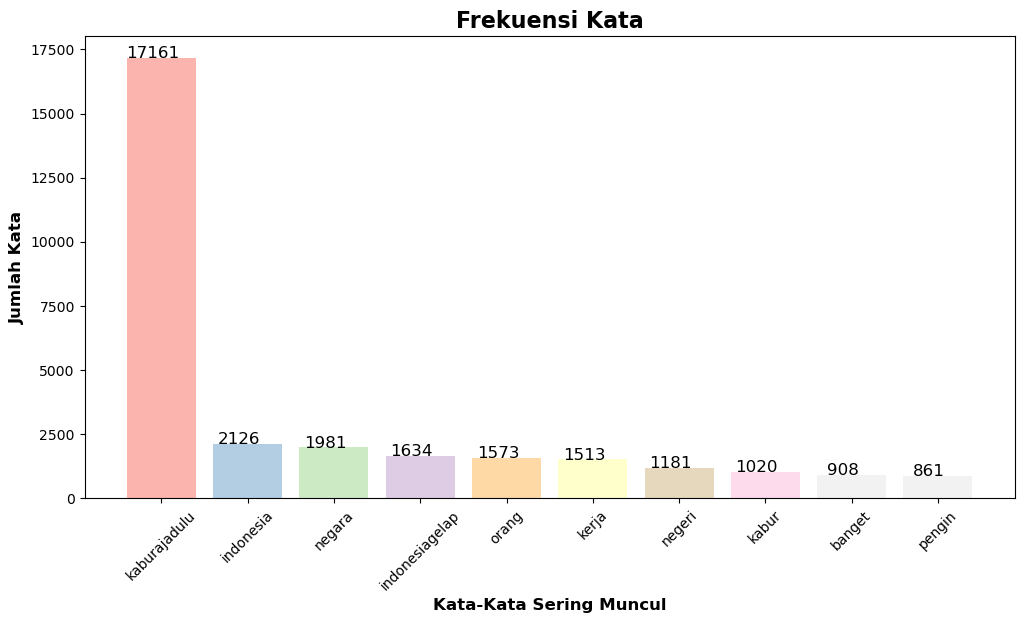

In [26]:
# memvisualisasikan frekuensi kata teratas dalam teks dari dataframe
# menampilkan 10 kata yang paling sering muncul beserta frekuensinya dalam bar chart


import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

text = " ".join(df['stemming'])

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','lu', 'deh', 'fyp', 'ya', 'gue', 'kak', 'tan', 'eh', 'wkwk', 'ajar', 'tuh', 'sok', 'lo', 'lu', 'sih'])

tokens = [word for word in text.split() if word not in stopwords]
word_counts = Counter(tokens)


top_words = word_counts.most_common(10)
word, count = zip(*top_words)

# Menggunakan palet warna lebih soft
colors = plt.cm.Pastel1(range(len(word)))

# Membuat plot
plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel('Kata-Kata Sering Muncul', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kata', fontsize=12, fontweight='bold')
plt.title('Frekuensi Kata', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()


In [28]:
# Ambil kolom yang dibutuhkan
df_ready = df[['full_text', 'stemming']]

# Cek datanya
df_ready.head()

,full_text,stemming
0,@IqbalRa17664055 @rwp1byte aku nyusul kerja aj...,susul kerja kaburajadulu bawa istri wkwkwk
1,#KaburAjaDulu bole juga ni hashtag,kaburajadulu nih hashtag
2,#KaburAjaDulu,kaburajadulu
3,Ehhh ini Mas Adith #KaburAjaDulu ya? Mohon ma...,eh mas adith kaburajadulu ya mohon maaf ya ya ...
4,Dengan ini saya resmikan pemilik hashtag #Kabu...,resmi milik hashtag kaburajadulu mas adith sah...


In [29]:
# Simpan ke file CSV
df_ready.to_csv("../data/processed/full_cleaned.csv", index=False)
print("✅ Data berhasil disimpan ke full_cleaned.csv")


✅ Data berhasil disimpan ke full_cleaned.csv
